# Homework 2

### Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
#import steam_analysis module to perform operations on the dataset
import steam_analysis as steam

### Load dataset

In [3]:
#dataset filenames
dataset_main = 'dataset/steam_reviews.csv'
dataset_bonus1 = 'dataset/steam_reviews_bonus_1.csv'
dataset_bonus2 = 'dataset/steam_reviews_bonus_2.csv'

In [7]:
#load main dataset
df = pd.read_csv(dataset_main)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
#load bonus dataset
df = pd.concat(pd.read_csv(dataset_bonus1))
df = pd.concat(pd.read_csv(dataset_bonus1))

### DEBUG

In [4]:
#skip the above two cells and run this one instead if you have problems loading the whole dataset
for chunk in pd.read_csv(dataset_main, chunksize=10000000):
    df = chunk
    break

# [RQ1] Exploratory Data Analysis (EDA)

## Description

In [5]:
#print a description of the dataset and a list of its columns
steam.describe_dataset(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned    

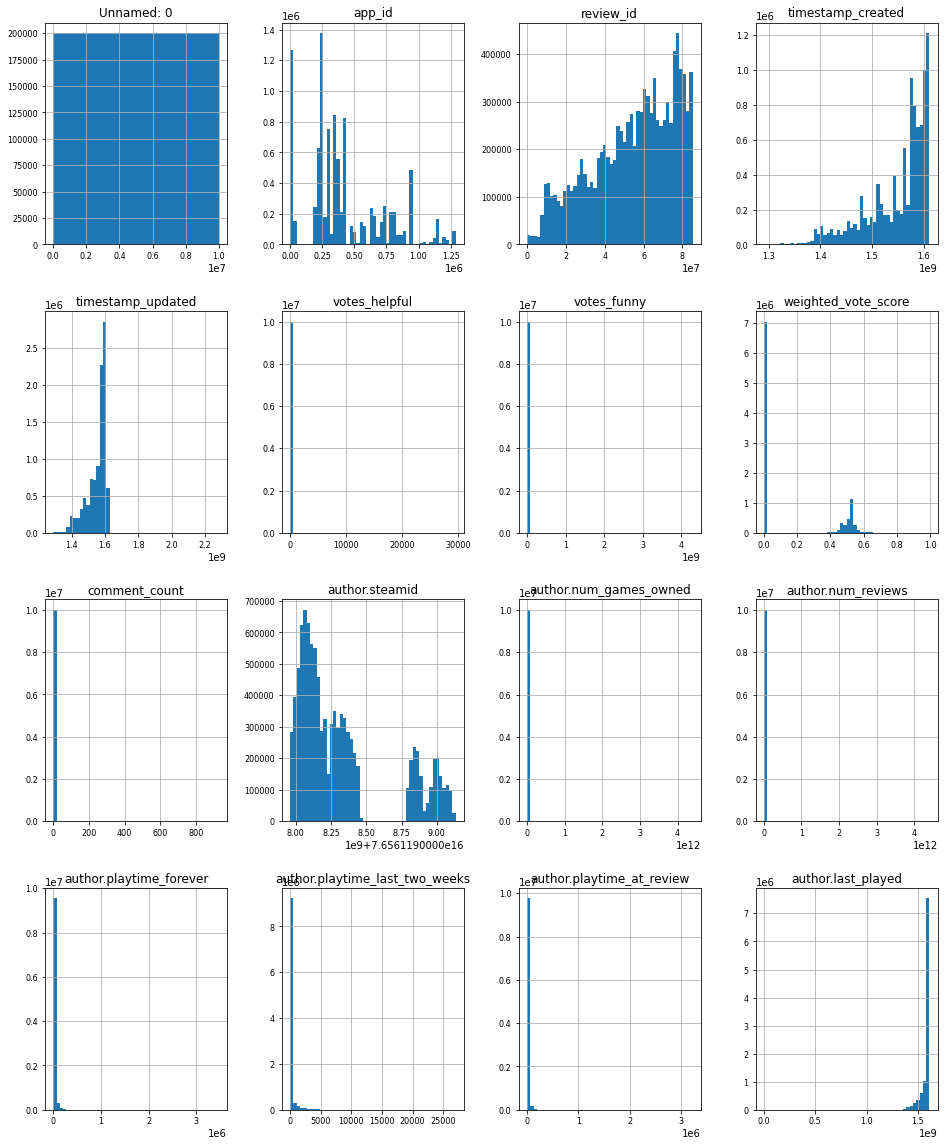

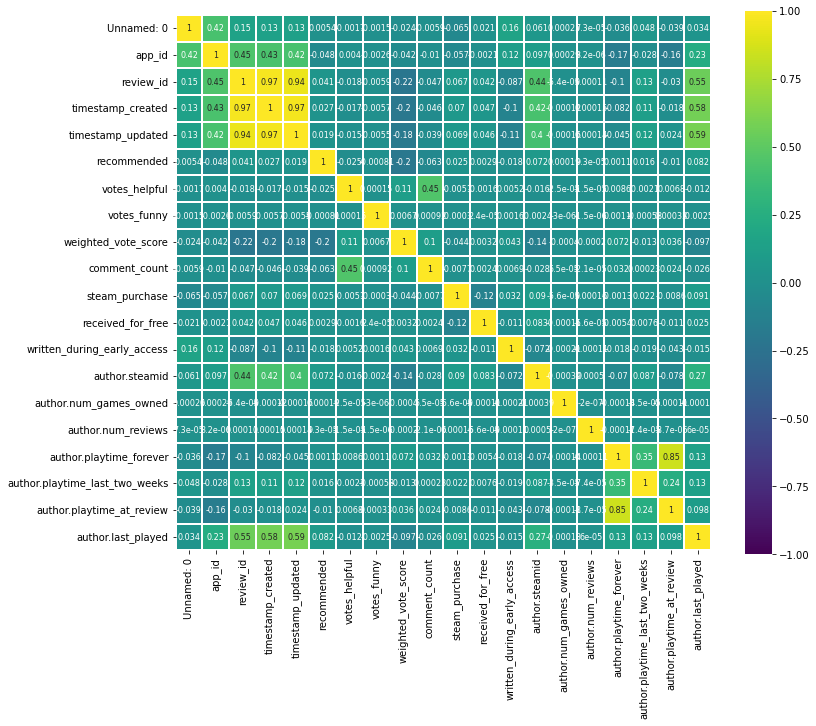

In [6]:
#print a summary analysis of the whole dataset, included a correlation graph
steam.plot_insight_graphs(df)

# [RQ2]

### Plot the number of reviews for each application in descending order.

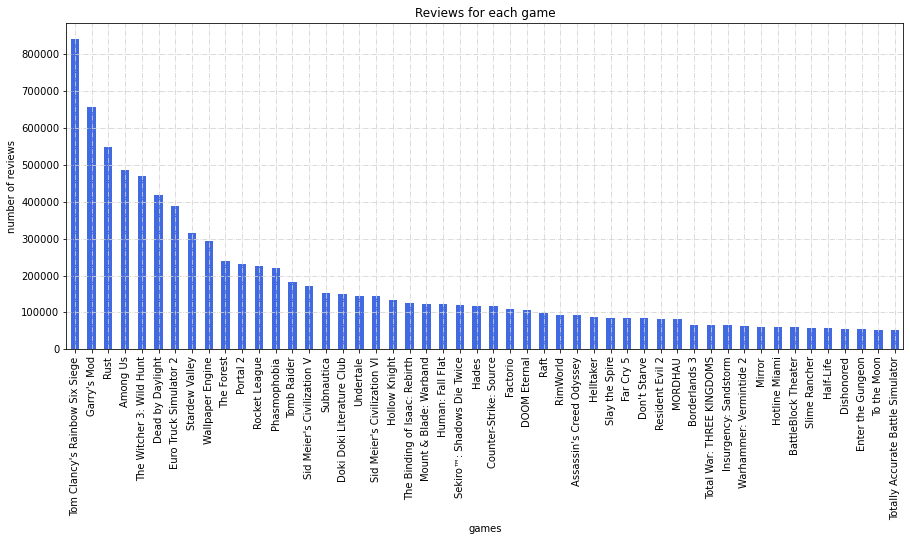

In [8]:
#plot a chart of the number of reviews for each game (for clarity the top 50)
steam.plot_reviews_chart(df, 50)

### What applications have the best Weighted Vote Score?

In [9]:
#print a list of the best weighted vote score
steam.best_weighted_vote_score(df)

app_name
Hunt Down The Freeman                0.502150
Identity                             0.415384
Umbrella Corps                       0.414678
X Rebirth                            0.380447
Warhammer 40,000: Dawn of War III    0.377935
Name: weighted_vote_score, dtype: float64


### Which applications have the most and the least recommendations?

In [ ]:
#print the five top recommended games and the five least recommended games
steam.recommendations_summary(df)

Most recommended games: 
app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     886417
Grand Theft Auto V                831311
Tom Clancy's Rainbow Six Siege    742397
Terraria                          658741
Garry's Mod                       632558
Name: recommended, dtype: int64 


Least recommended games: 
app_name
Out of the Park Baseball 19    594
Shadow Complex Remastered      587
Identity                       439
DRAGON QUEST HEROES™ II        423
Neon Hardcorps                  89
Name: recommended, dtype: int64


### How many of these applications were purchased, and how many were given for free?

                       received_for_free  steam_purchase
app_name                                                
20XX                                  51            3204
A Hat in Time                        820           27262
A Short Hike                          99            4566
A Way Out                            296            7416
ARK: Survival Evolved              12046          316015 



Games received for free: 688061/21747371


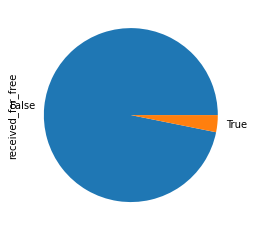

Games purchased: 16842432/21747371


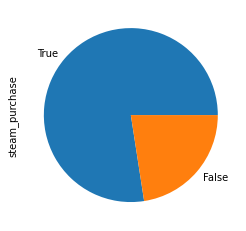

In [ ]:
#print a table of the steam_purchase and received_for_free for each game in the dataset
#print a two pie charts for each of them
steam.plot_free_or_purchased(df)

# [RQ3]

### What is the most common time that authors review an application? For example, authors usually write a review at 17:44.

In [ ]:
#print most common time at which an application is reviewed
steam.most_common_review_time(df, 5)

19:04
18:19
18:41
18:26
18:38


### Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.

### Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:

  time interval (start, end)  total reviews
0       (06:00:00, 10:59:59)         176424
1       (11:00:00, 13:59:59)         138074
2       (14:00:00, 16:59:59)         159448
3       (17:00:00, 19:59:59)         160144
4       (20:00:00, 23:59:59)         172427
5       (00:00:00, 02:59:59)         100229
6       (03:00:00, 05:59:59)          93254


<Figure size 432x288 with 0 Axes>

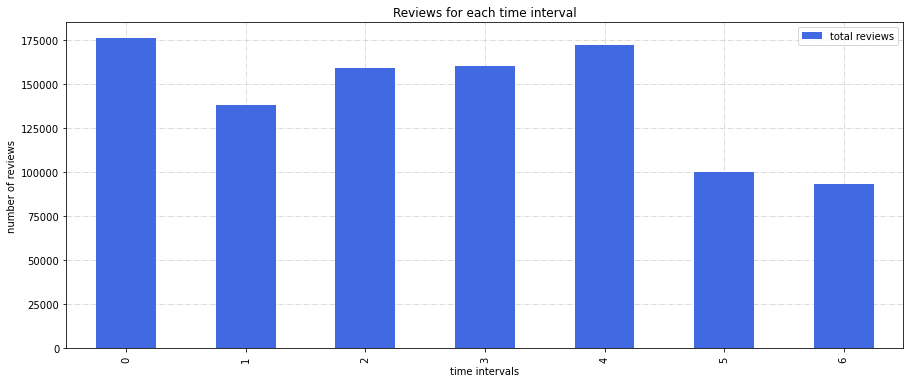

In [ ]:
#list of tuple of time intervals as requested in the Research Question (RQ)
time_intervals = [('06:00:00', '10:59:59'),
('11:00:00', '13:59:59'),
('14:00:00', '16:59:59'),
('17:00:00', '19:59:59'),
('20:00:00', '23:59:59'),
('00:00:00', '02:59:59'),
('03:00:00', '05:59:59')]

#print a bar plot of the number of reviews for each time interval passed
steam.reviews_between_time_intervals(df, time_intervals)


# [RQ8]

### Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choice.

In [ ]:
df_group_1 = df.groupby(['language'])

In [11]:
df_one = df[['language', 'weighted_vote_score']]
russian_weight = df_one[df_one['language'] == 'russian'].weighted_vote_score.mean()
chinese_weight = df_one[df_one['language'] == 'chinese'].weighted_vote_score.mean()
print(russian_weight, chinese_weight)

0.19766714621825282 nan


### Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

,author.playtime_at_review,weighted_vote_score
author.playtime_at_review,1.000000,0.009929
weighted_vote_score,0.009929,1.000000


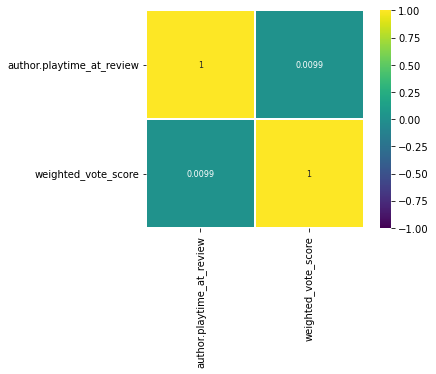

In [9]:
df_corr = df[['author.playtime_at_review', 'weighted_vote_score']]
corr = df_corr.corr(method='pearson')
sns.heatmap(corr, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
 annot=True, annot_kws={"size": 8}, square=True)
corr

### What are histograms, bar plots, scatterplots and pie charts used for?

..............................................................................

### Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

..............................................................................